In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.fftpack import fftshift, ifftshift
import cmath
import pylab

In [2]:
import numpy as np
import numpy.fft as fft
import scipy.ndimage as nd
import scipy.misc as misc
from math import pi

In [3]:
def sample_data(N):
    """Information for the testing sample, and the particles are located in the centre
    input: 
    N, particles number along a side
    L, length of the sample
    output: """
    n=int(N/2)
    L=N
    a=np.ones((N,N))
    sample = np.pad(a, ((5*N,5*N) , (5*N,5*N)), mode = 'constant', constant_values=(1e-16, 1e-16))
    return sample
    

In [24]:
def phase_retrieval(N,iters):
    """Recovering the diffraction pattern, sample and phase diagram"""
    
    beta=0.9 #constant for HIO
    L=N 
    mid=int(11*N/2) # mid point of the sample
    sample=sample_data(N) #sample density 
    p=int(N*N)
    #ploting 
    plt.title('2D sample with %i pixels'%p,fontsize=20)
    plt.xlabel('Pixels',fontsize=20)
    plt.ylabel('Pixels',fontsize=20)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    pylab.pcolor(sample.real,cmap='jet')
    bb1=plt.colorbar()
    bb1.ax.tick_params(labelsize=14)
    plt.show()
    
    #fourier transform of the density of the particles
    dg_FFT = np.fft.fftn(fftshift(sample))  #diffraction pattern on sides
    amplitude=abs(dg_FFT) # amplitude of the pattern
    intensity=fftshift(abs(dg_FFT*np.conj(dg_FFT)))
    #diffraction pattern in the centre
    #ploting 
    plt.title('Initial intensity pattern',fontsize=20)
    plt.xlabel('$Pixels^{-1}$',fontsize=20)
    plt.ylabel('$Pixels^{-1}$',fontsize=20)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    pylab.pcolor(intensity[mid-40:mid+40,mid-40:mid+40], cmap='jet')
    bb2=plt.colorbar()
    bb2.ax.tick_params(labelsize=15)
    plt.show()
    
    psi_degree=np.random.randint(0,360,size=(11*N,11*N)) 
    psi_pi=2*pi*psi_degree/360
    psi_pi1=np.zeros((11*N,11*N))
    
    #ploting 
    plt.title('Initial phase diagram',fontsize=20)
    plt.xlabel('Pixels',fontsize=20)
    plt.ylabel('Pixels',fontsize=20)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    pylab.pcolor(psi_pi1,cmap='jet') 
    bb3=plt.colorbar()
    bb3.ax.tick_params(labelsize=15)
    plt.show()
    
    #sample1 = np.abs(np.real(fftshift(np.fft.ifftn(amplitude*np.exp(1j*psi_pi)))))
    sample1 = np.abs(np.real(fftshift(np.fft.ifftn(amplitude))))
    #initial phase=0
 
    sample1[0:5*L,0:11*L]=1e-16
    sample1[6*L:11*L,0:11*L]=1e-16
    sample1[5*L:6*L,0:5*L]=1e-16
    sample1[5*L:6*L,6*L:11*L]=1e-16
    # support constaints
    
    nbig=0 
    #chi_s_list=[]
    chi_d_list=[]
    delta_s = sample1 - sample
    chi_sq_s = np.sum(np.abs(delta_s))/np.sum(sample)
    chi_s_list=[chi_sq_s]
    n1=1
    nbig=0
    
    while nbig <= iters:
        #error reduction algorithm
        nn=0    
        while nn < 3 and chi_s_list[n1-1]>=1e-8:
            sample2=sample1
            pattern_wrong=np.fft.fftn(fftshift(sample1)) 
            pattern_phase=np.angle(pattern_wrong)
            pattern_true=amplitude*np.exp(1j*pattern_phase)
            sample1 = np.abs(np.real(fftshift(np.fft.ifftn(pattern_true))))
            sample1[0:5*L,0:11*L]=1e-16
            sample1[6*L:11*L,0:11*L]=1e-16
            sample1[5*L:6*L,0:5*L]=1e-16
            sample1[5*L:6*L,6*L:11*L]=1e-16
            sample3=sample1
        
            delta_s = sample1 - sample
            intensity_wrong=(abs(pattern_wrong))**2
            delta_d = amplitude**2-intensity_wrong
            
            #the chi square of the sample and diffraction pattern
            chi_sq_s = np.sum(np.abs(delta_s))/np.sum(sample)
            chi_sq_d = np.sum(np.abs(delta_d))/np.sum(amplitude**2) 
            chi_s_list.append(chi_sq_s)
            chi_d_list.append(chi_sq_d)
            
            nn+=1 
            n1+=1
        
        #Plot
        plt.title('Intensity pattern after %i iterations'%(n1-1),fontsize=20)
        plt.xlabel('$Pixels^{-1}$',fontsize=20)
        plt.ylabel('$Pixels^{-1}$',fontsize=20)
        plt.xticks(size = 14)
        plt.yticks(size = 14)
        pylab.pcolor(intensity[mid-40:mid+40,mid-40:mid+40], cmap='jet')
        bb4=plt.colorbar()
        bb4.ax.tick_params(labelsize=15)
        #plt.colorbar(label='Intensity')
        plt.show()

        plt.title('Retrieved phase after %i iterations'%(n1-1),fontsize=20)
        plt.xlabel('Pixels',fontsize=20)
        plt.ylabel('Pixels',fontsize=20)
        plt.xticks(size = 14)
        plt.yticks(size = 14)
        pylab.pcolor(pattern_phase,cmap='jet') 
        bb5=plt.colorbar()
        bb5.ax.tick_params(labelsize=15)
        plt.show()

        plt.title('Retrieved sample after %i iterations'%(n1-1),fontsize=20)
        plt.xlabel('Pixels',fontsize=20)
        plt.ylabel('Pixels',fontsize=20)
        plt.xticks(size = 14)
        plt.yticks(size = 14)
        pylab.pcolor(sample1.real,cmap='jet')
        bb6=plt.colorbar()
        bb6.ax.tick_params(labelsize=15)
        plt.show()    
        
        #HIO algorithm
        n=0
        while n < 3 and chi_s_list[n1-1]>=1e-8:
            sample4 = np.zeros((11*L,11*L))
            for i in range (0,11*L):
                for j in range (0,11*L):
                    if 5*L <= i <= 6*L and 5*L <= j <= 6*L:
                        sample4[i,j] = np.abs(np.real(sample3[i,j]))
                    else:
                        sample4[i,j] = np.abs(np.real(sample2[i,j] - sample3[i,j]*beta))
                        
            pattern_wrong=np.fft.fftn(fftshift(sample4)) 
            pattern_phase=np.angle(pattern_wrong)
            pattern_true=amplitude*np.exp(1j*pattern_phase)  
            sample2 = sample3
            sample3 = np.abs(np.real(fftshift(np.fft.ifftn(pattern_true))))
            
            delta_s = sample3 - sample
            intensity_wrong=(abs(pattern_wrong))**2
            delta_d = amplitude**2-intensity_wrong
            
            #the chi square of the sample and diffraction pattern
            chi_sq_s = np.sum(np.abs(delta_s))/np.sum(sample)
            chi_sq_d = np.sum(np.abs(delta_d))/np.sum(amplitude**2) 
            chi_s_list.append(chi_sq_s)
            chi_d_list.append(chi_sq_d)
            n+=1
            n1+=1
            
        #support constraints        
        sample1=sample3
        sample1[0:5*L,0:11*L]=1e-16
        sample1[6*L:11*L,0:11*L]=1e-16
        sample1[5*L:6*L,0:5*L]=1e-16
        sample1[5*L:6*L,6*L:11*L]=1e-16
        
        nbig+=1
    #final intensity
    intensity_re = fftshift(abs(pattern_true*np.conj(pattern_true)))
    #plt.imshow(intensity_re[140:160,140:160])

    #plot
    plt.title('Intensity pattern after %i iterations'%(n1-1),fontsize=20)
    plt.xlabel('$Pixels^{-1}$',fontsize=20)
    plt.ylabel('$Pixels^{-1}$',fontsize=20)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    pylab.pcolor(intensity_re[mid-40:mid+40,mid-40:mid+40], cmap='jet')
    bb7=plt.colorbar()
    bb7.ax.tick_params(labelsize=15)
    #plt.colorbar(label='Intensity')
    plt.show()
    
    plt.title('Retrieved phase after %i iterations'%(n1-1),fontsize=20)
    plt.xlabel('Pixels',fontsize=20)
    plt.ylabel('Pixels',fontsize=20)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    pylab.pcolor(pattern_phase,cmap='jet') 
    bb8=plt.colorbar()
    bb8.ax.tick_params(labelsize=15)
    plt.show()
    
    plt.title('Retrieved sample after %i iterations'%(n1-1),fontsize=20)
    plt.xlabel('Pixels',fontsize=20)
    plt.ylabel('Pixels',fontsize=20)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    pylab.pcolor(sample1.real,cmap='jet')
    bb9=plt.colorbar()
    bb9.ax.tick_params(labelsize=15)
    plt.show()
    
    #print(chi_d_list)
    xx1=np.arange(0,n1)
    plt.plot(xx1,chi_s_list, "--",label = '$\chi^2$ of sample')
    plt.plot(chi_d_list,label = '$\chi^2$ of diffraction pattern')
    #plt.title('The $\chi^2$ of sample and diffraction pattern against iteration numbers($\phi$=0)')
    plt.xlabel('Number of iterations',fontsize=20)
    plt.ylabel('$\chi^2$',fontsize=20)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.legend()
    plt.grid()

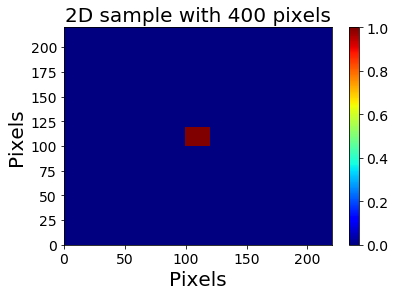

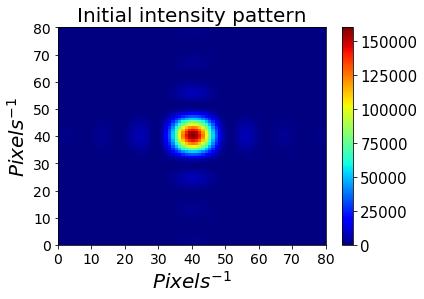

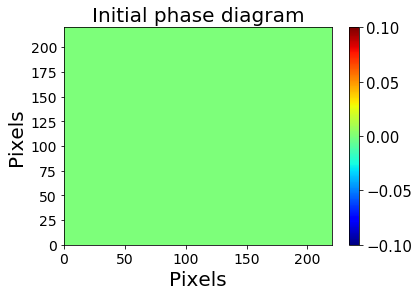

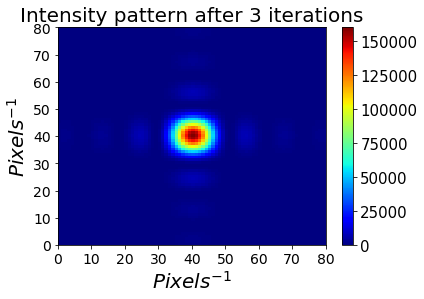

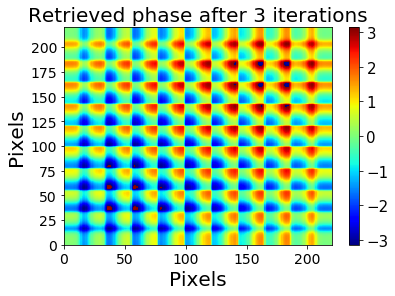

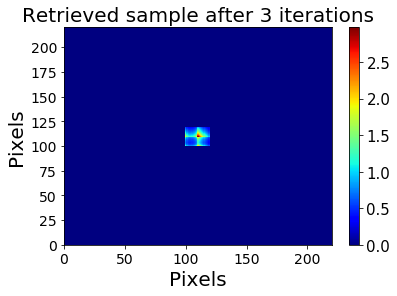

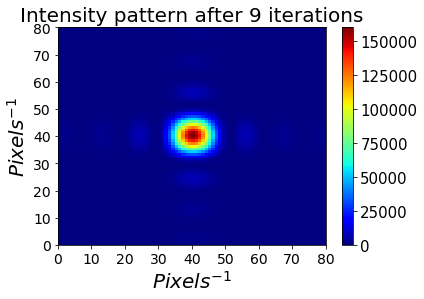

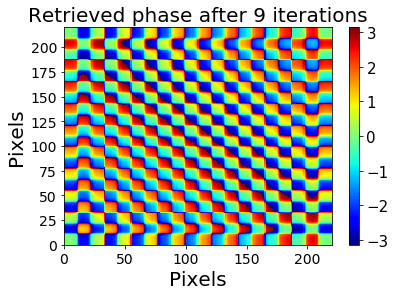

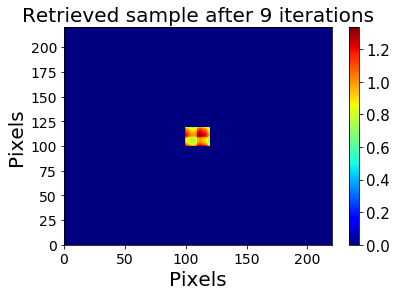

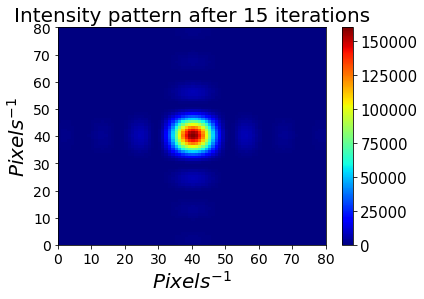

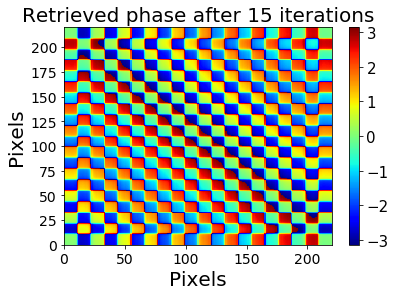

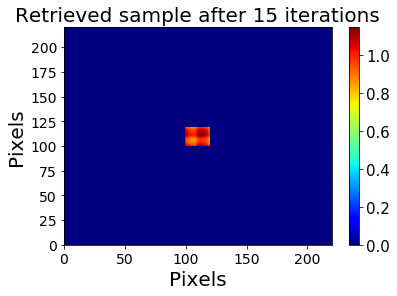

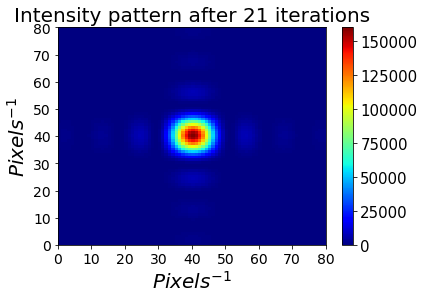

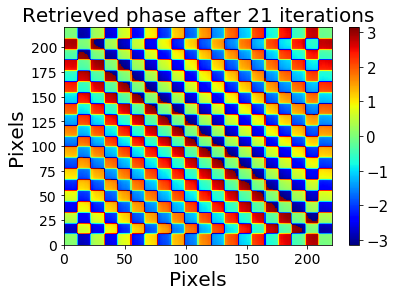

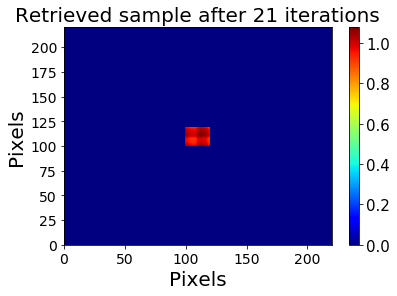

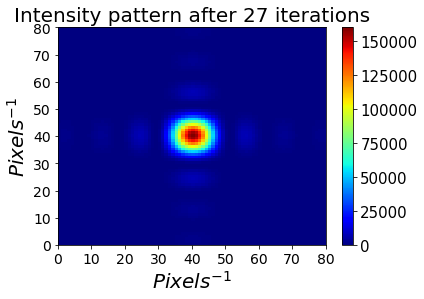

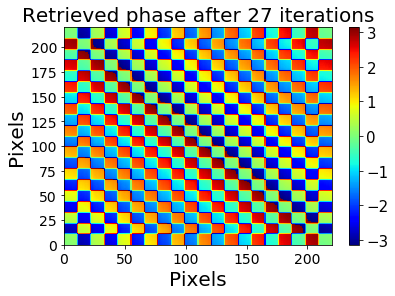

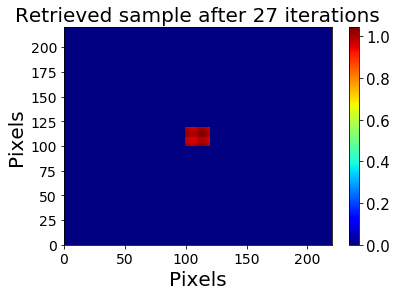

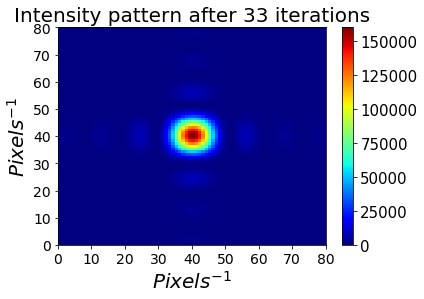

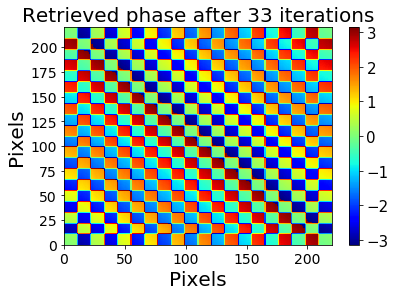

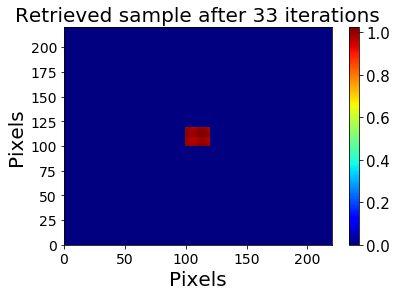

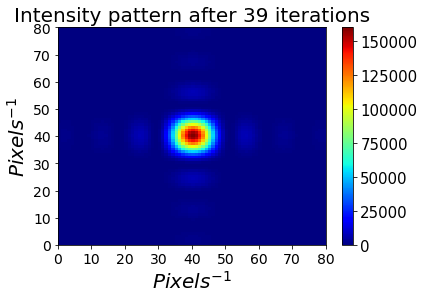

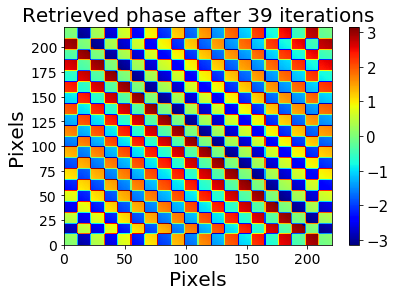

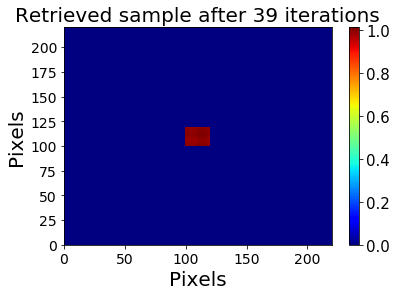

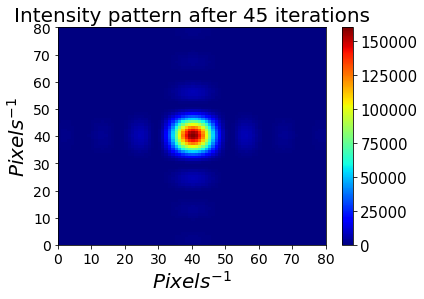

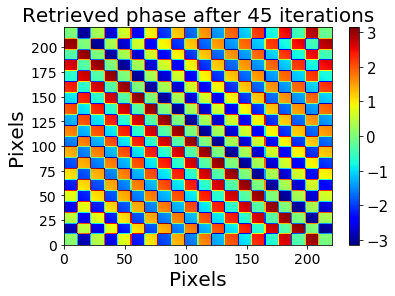

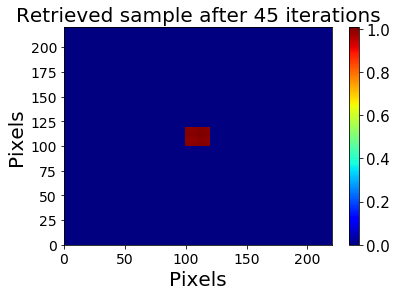

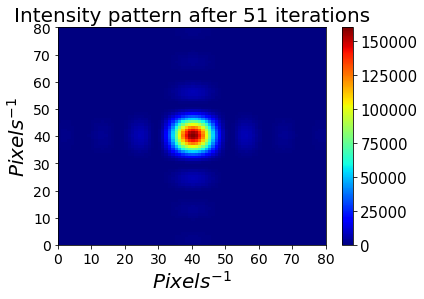

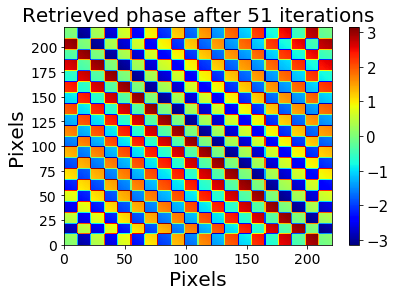

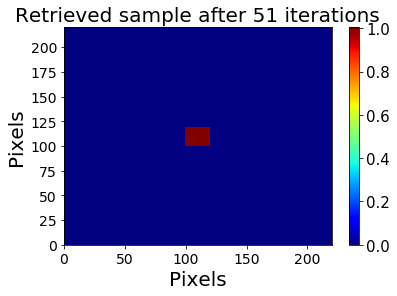

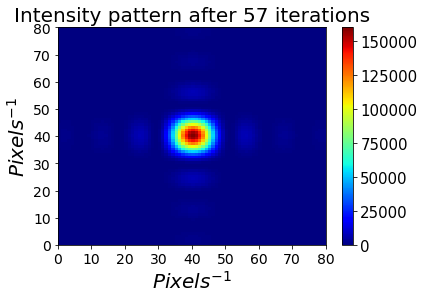

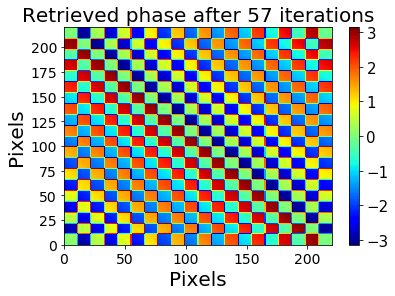

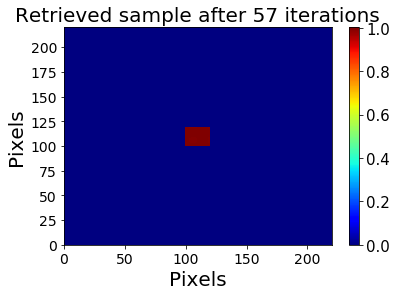

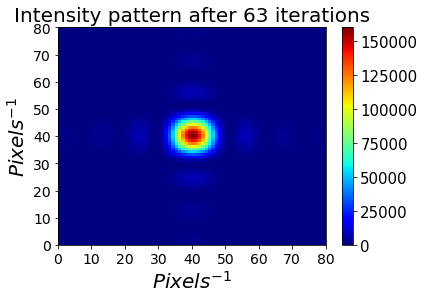

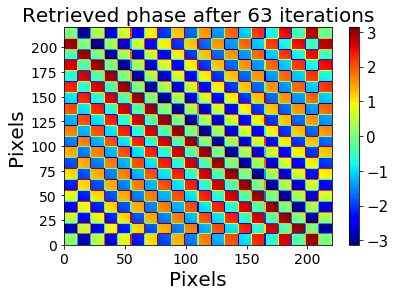

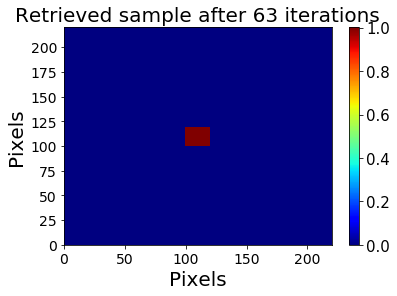

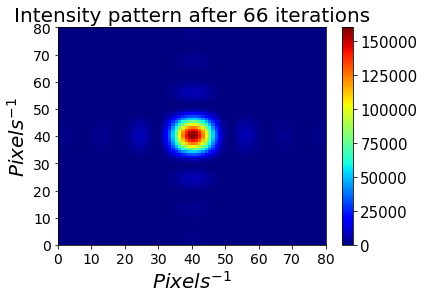

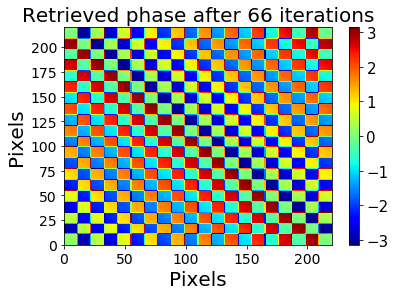

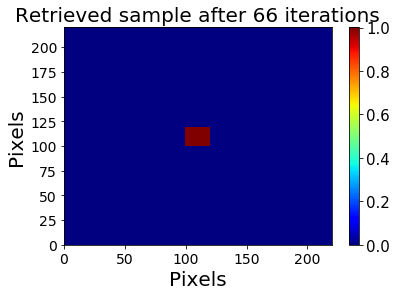

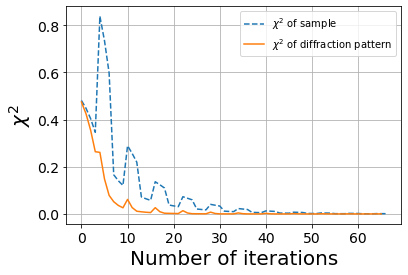

In [29]:
phase_retrieval(20,10)